In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Multi-Classification

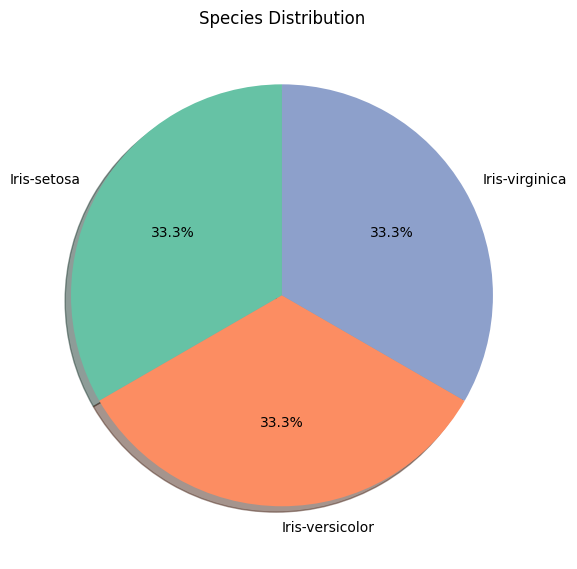

In [ ]:
# Calculate percentage and plot
plt.figure(figsize=(6,6))
df.Species.value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',           # Show percentage with one decimal
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],  # Example color palette
    startangle=90,               # Rotate for better layout
    shadow=True,                 # Optional: adds depth
    figsize=(6, 6),              # Optional: adjust size
    ylabel=''                    # Remove default label
)

plt.title('Species Distribution')
plt.tight_layout()
plt.show()